In [1]:
library('dplyr')
library(pastecs) 
library(ROSE)
library(InformationValue)
library("ggplot2")
library("e1071")
library('caret')
library(rpart)
library(party)       
library(rpart.plot)
library(rattle)
library(rpart.plot)
library(RColorBrewer)
library(randomForest)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'pastecs'

The following objects are masked from 'package:dplyr':

    first, last

Warning message:
"package 'ROSE' was built under R version 3.5.3"Loaded ROSE 0.0-3

Loading required package: lattice

Attaching package: 'caret'

The following objects are masked from 'package:InformationValue':

    confusionMatrix, precision, sensitivity, specificity

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Rattle: A free graphical interface for data science with R.
Version 5.2.0 Co

In [2]:
fraud_data <- read.csv("D:\\files and documents\\Rwork\\fraud.csv",
                       header = TRUE,
                       strip.white = TRUE,
                       stringsAsFactors = FALSE,
                       sep = ','
                       
)

In [5]:
head(fraud_data)
str(fraud_data)

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff,type2
1,PAYMENT,9839.64,C1231006815,170136,160296.36,M1979787155,0,0,0,0,9839.64,1
1,PAYMENT,1864.28,C1666544295,21249,19384.72,M2044282225,0,0,0,0,1864.28,1
1,TRANSFER,181.00,C1305486145,181,0.00,C553264065,0,0,1,0,181.00,5
1,CASH_OUT,181.00,C840083671,181,0.00,C38997010,21182,0,1,0,181.00,3
1,PAYMENT,11668.14,C2048537720,41554,29885.86,M1230701703,0,0,0,0,11668.14,1
1,PAYMENT,7817.71,C90045638,53860,46042.29,M573487274,0,0,0,0,7817.71,1


'data.frame':	1048575 obs. of  13 variables:
 $ step          : int  1 1 1 1 1 1 1 1 1 1 ...
 $ type          : chr  "PAYMENT" "PAYMENT" "TRANSFER" "CASH_OUT" ...
 $ amount        : num  9840 1864 181 181 11668 ...
 $ nameOrig      : chr  "C1231006815" "C1666544295" "C1305486145" "C840083671" ...
 $ oldbalanceOrg : num  170136 21249 181 181 41554 ...
 $ newbalanceOrig: num  160296 19385 0 0 29886 ...
 $ nameDest      : chr  "M1979787155" "M2044282225" "C553264065" "C38997010" ...
 $ oldbalanceDest: num  0 0 0 21182 0 ...
 $ newbalanceDest: num  0 0 0 0 0 ...
 $ isFraud       : int  0 0 1 1 0 0 0 0 0 0 ...
 $ isFlaggedFraud: int  0 0 0 0 0 0 0 0 0 0 ...
 $ balance_diff  : num  9840 1864 181 181 11668 ...
 $ type2         : num  1 1 5 3 1 1 1 1 1 4 ...


In [6]:
## making balance diiference as a new column and type as a new column

fraud_data<-mutate(fraud_data, balance_diff = fraud_data$oldbalanceOrg-fraud_data$newbalanceOrig)
levels(fraud_data$type)

fraud_data<- mutate(fraud_data, type2 = ifelse(type == 'PAYMENT',1,
                                               ifelse(type == 'CASH_IN',2,
                                                      ifelse(type == 'CASH_OUT',3,
                                                             ifelse(type == 'DEBIT',4,
                                                                    ifelse(type == 'TRANSFER',5,6
                                                                    ))))))
head(fraud_data)  

NULL

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff,type2
1,PAYMENT,9839.64,C1231006815,170136,160296.36,M1979787155,0,0,0,0,9839.64,1
1,PAYMENT,1864.28,C1666544295,21249,19384.72,M2044282225,0,0,0,0,1864.28,1
1,TRANSFER,181.00,C1305486145,181,0.00,C553264065,0,0,1,0,181.00,5
1,CASH_OUT,181.00,C840083671,181,0.00,C38997010,21182,0,1,0,181.00,3
1,PAYMENT,11668.14,C2048537720,41554,29885.86,M1230701703,0,0,0,0,11668.14,1
1,PAYMENT,7817.71,C90045638,53860,46042.29,M573487274,0,0,0,0,7817.71,1


In [7]:
##  making data under sample and e.t.c


table(fraud_data$isFraud)

table(fraud_data$isFraud)
1142*2

pp <- subset(fraud_data,isFraud ==0)
r<- subset(fraud_data,isFraud ==1)
set.seed(123)
s <- sample(nrow(pp),0.00109*nrow(pp))
pp[s,] -> p


fraud_data_under<- rbind(p,r)


      0       1 
1047433    1142 


      0       1 
1047433    1142 

[1] 2284

In [8]:
table(fraud_data_under$isFraud)


table(fraud_data_under$isFraud)


   0    1 
1141 1142 


   0    1 
1141 1142 

In [7]:
# 1) univarete

In [9]:

sum(is.na(fraud_data_under))

summary(fraud_data_under$type)

summary(fraud_data_under$amount)

summary(fraud_data_under$newbalanceOrig)       

summary(fraud_data_under$oldbalanceOrg)       

summary(fraud_data_under$newbalanceDest) 

summary(fraud_data_under$oldbalanceDest)  

[1] 0

   Length     Class      Mode 
     2283 character character 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
      82    24661   150064   671927   461510 10000000 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       0        0        0   491473        0 22700000 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       0    10565    98621  1070517   720833 22500000 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       0        0   108184  1085155  1112015 34600000 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       0        0        0   712825   485946 33000000 

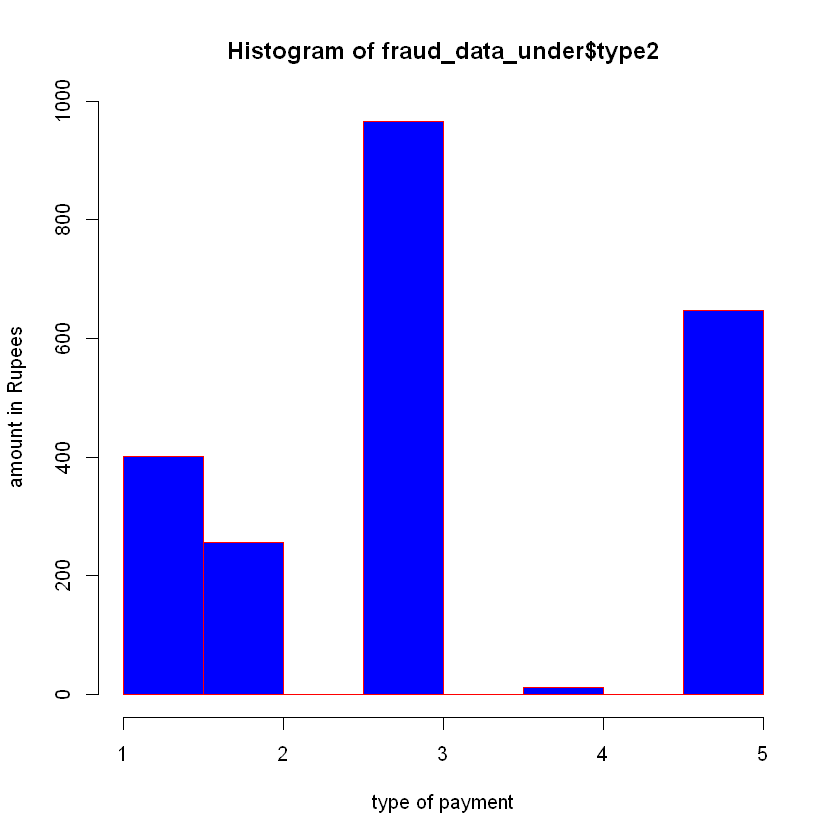

In [10]:
# on type of payment

hist(fraud_data_under$type2,
     xlab = "type of payment",
     ylab = "amount in Rupees",
     col = "blue",
     border = "red"
     
)

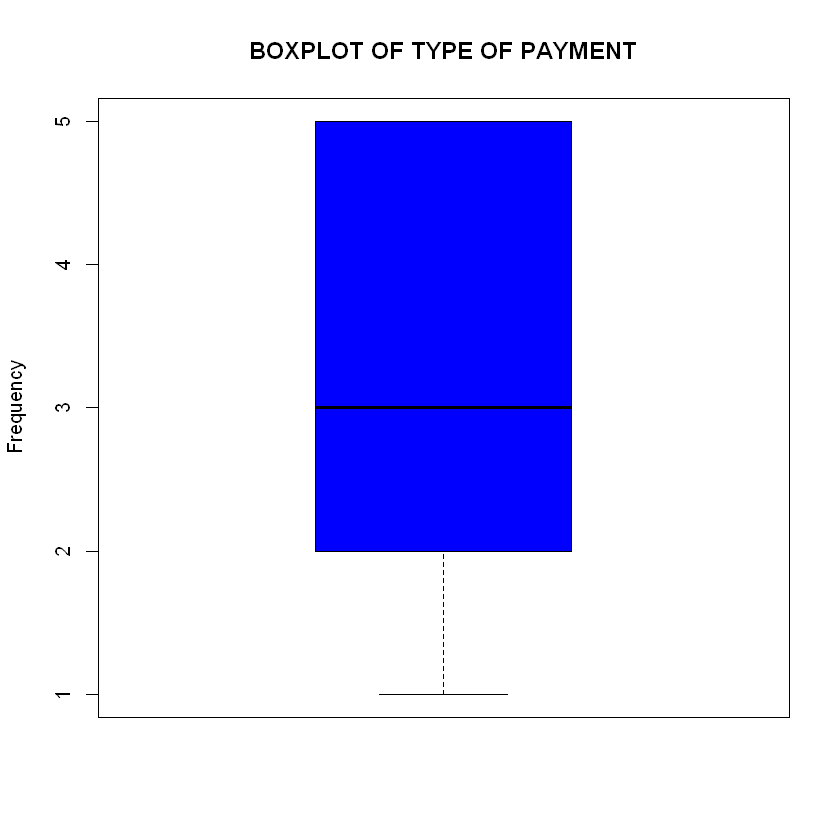

In [15]:
boxplot(fraud_data_under$type2,
        main = toupper("Boxplot of type of payment"),
        ylab = "Frequency",
        col = "blue")

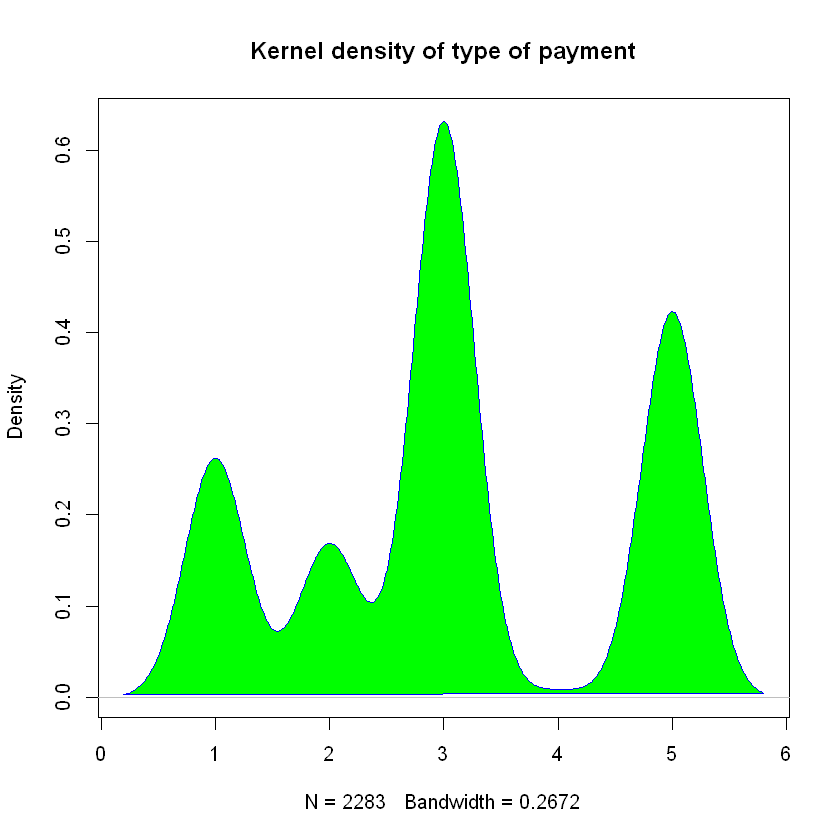

In [16]:

d <- density(fraud_data_under$type2, na.rm=TRUE)
plot(d, main = "Kernel density of type of payment")
polygon(d, col = "green", border = "blue")


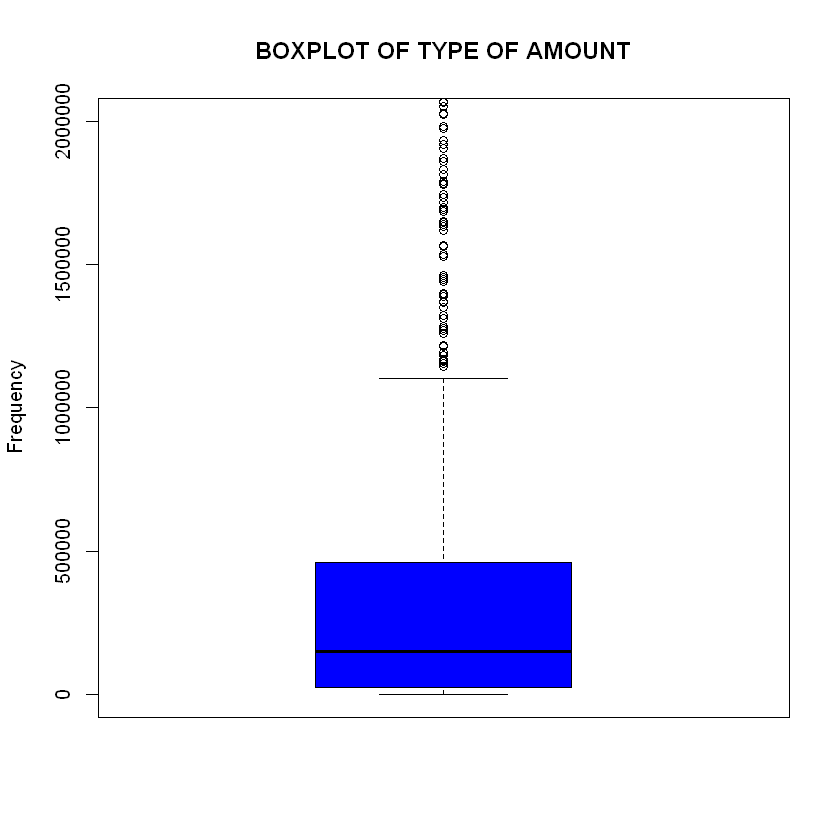

In [21]:
# on amount



boxplot(fraud_data_under$amount,
        main = toupper("Boxplot of type of amount"),
        ylab = "Frequency",
        ylim = c(0,2000000),
        col = "blue")

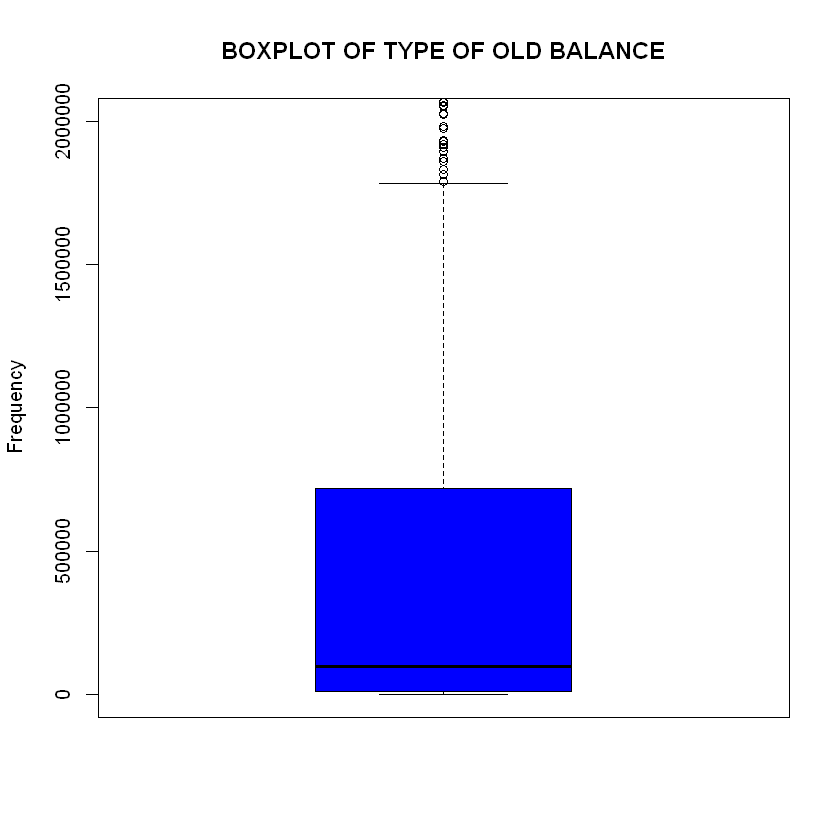

In [22]:

# on oldbalance

boxplot(fraud_data_under$oldbalanceOrg,
        main = toupper("Boxplot of type of old balance"),
        ylab = "Frequency",
        col = "blue",
        ylim = c(0,2000000))

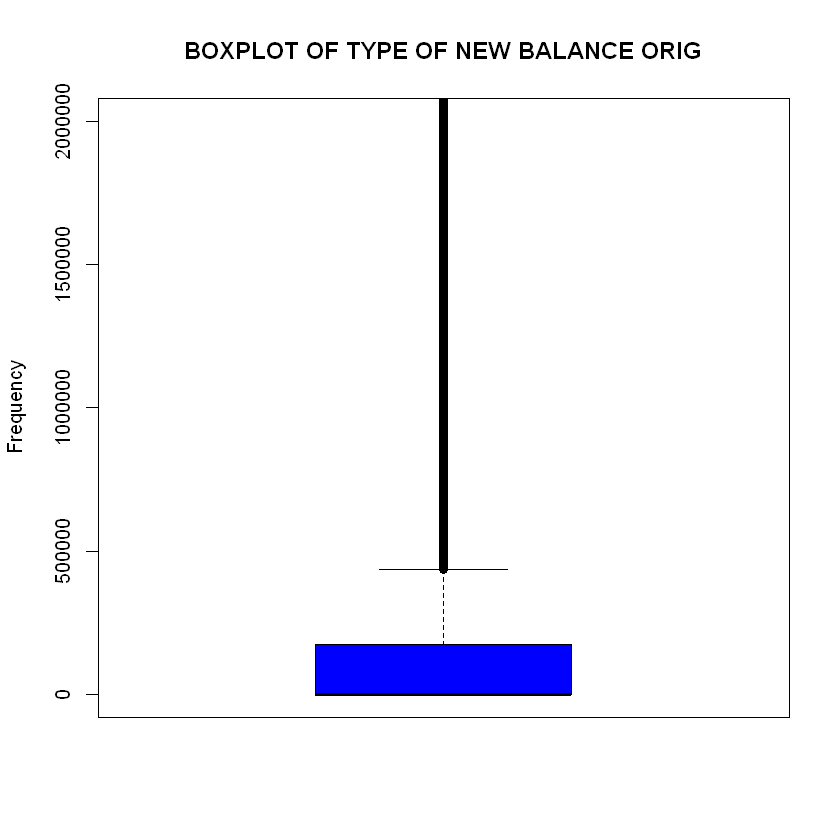

In [29]:
# new balance 

boxplot(fraud_data$newbalanceOrig,
        main = toupper("Boxplot of type of new balance orig"),
        ylab = "Frequency",
        col = "blue",
         ylim = c(0,2000000)
      )



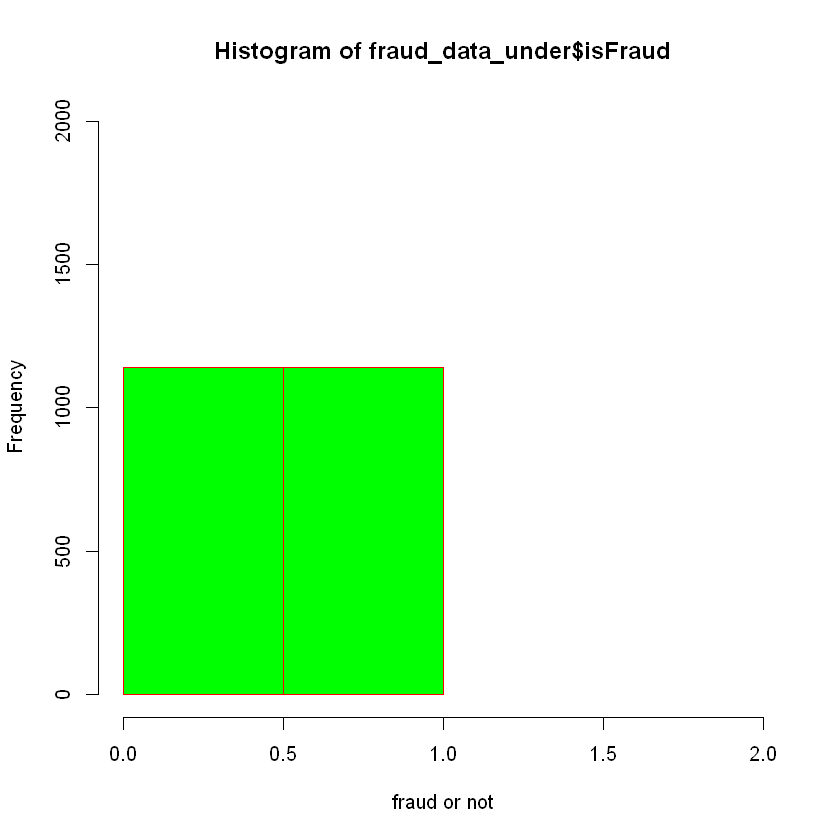

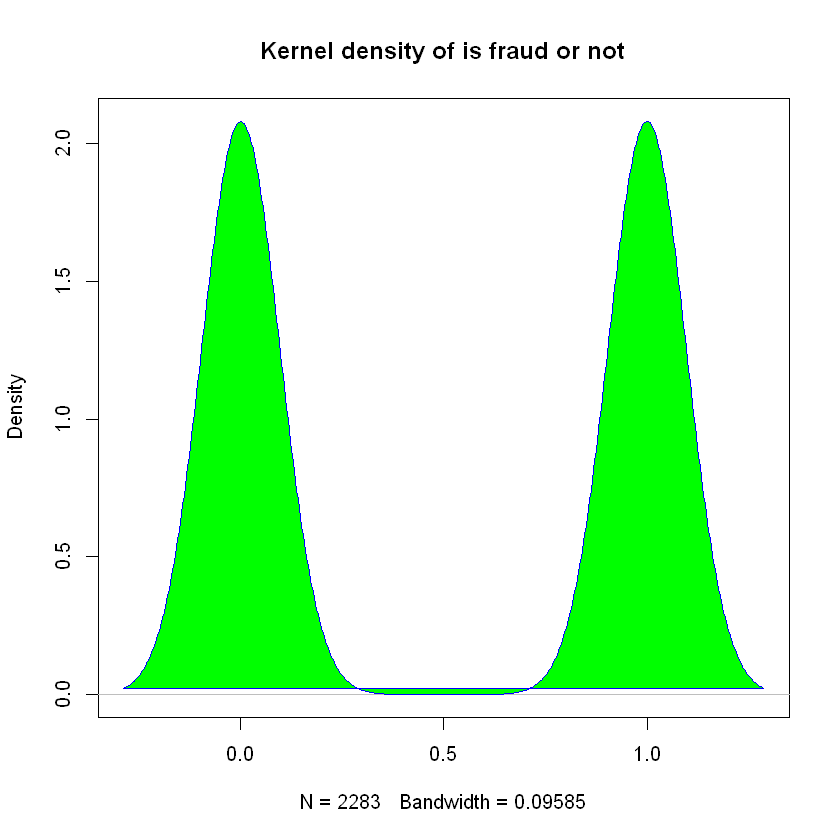

In [31]:
# on isfraud

hist(fraud_data_under$isFraud,
     xlab = "fraud or not",
     col = "green",
     border = "red", 
     xlim = c(0,2),
     ylim = c(0,2000),
     breaks = 2)

d <- density(fraud_data_under$isFraud, na.rm=TRUE)
plot(d, main = "Kernel density of is fraud or not")
polygon(d, col = "green", border = "blue")

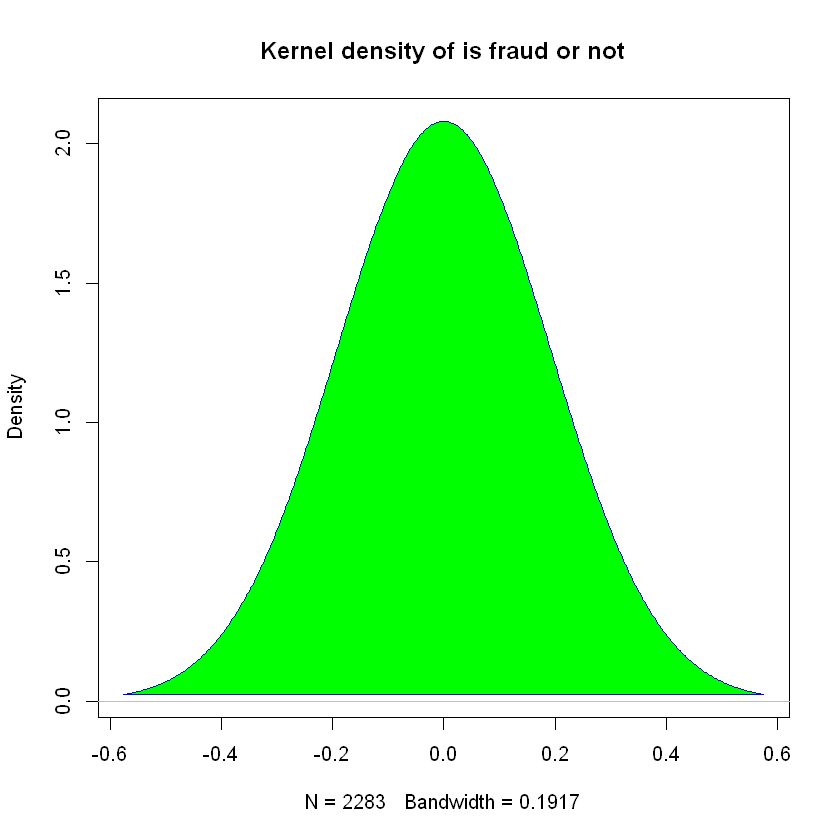

In [36]:
# on is flagged fraud


d <- density(fraud_data_under$isFlaggedFraud, na.rm=TRUE)
plot(d, main = "Kernel density of is fraud or not")
polygon(d, col = "green", border = "blue")




In [11]:
## making numeric numbers to factors



fraud_data_under$isFraud <- factor(fraud_data_under$isFraud)
fraud_data_under$isFlaggedFraud <- factor(fraud_data_under$isFlaggedFraud)
fraud_data_under$type <- factor(fraud_data_under$type)
fraud_data_under$type2 <- factor(fraud_data_under$type2)
str(fraud_data_under)


'data.frame':	2283 obs. of  13 variables:
 $ step          : int  15 41 18 43 45 9 22 43 33 19 ...
 $ type          : Factor w/ 5 levels "CASH_IN","CASH_OUT",..: 2 2 5 2 4 4 4 2 2 2 ...
 $ amount        : num  185551 33767 343367 45613 4235 ...
 $ nameOrig      : chr  "C1653609526" "C1842177536" "C1944515290" "C475596985" ...
 $ oldbalanceOrg : num  0 19498 204008 0 60776 ...
 $ newbalanceOrig: num  0 0 0 0 56541 ...
 $ nameDest      : chr  "C331527117" "C2059139018" "C294136632" "C1864745052" ...
 $ oldbalanceDest: num  726244 0 11425 1096106 0 ...
 $ newbalanceDest: num  911795 33767 204009 1141719 0 ...
 $ isFraud       : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ isFlaggedFraud: Factor w/ 1 level "0": 1 1 1 1 1 1 1 1 1 1 ...
 $ balance_diff  : num  0 19498 204008 0 4235 ...
 $ type2         : Factor w/ 5 levels "1","2","3","4",..: 3 3 5 3 1 1 1 3 3 3 ...


In [12]:
## split and test data


set.seed(123)
fraud_data_split <- sample(nrow(fraud_data_under),0.8*nrow(fraud_data_under))

fraud_data_train <- fraud_data_under[fraud_data_split,]       

fraud_data_test <- fraud_data_under[-fraud_data_split,]  
str(fraud_data_train)

'data.frame':	1826 obs. of  13 variables:
 $ step          : int  44 57 40 71 83 45 6 73 10 19 ...
 $ type          : Factor w/ 5 levels "CASH_IN","CASH_OUT",..: 2 2 4 5 5 1 2 5 2 2 ...
 $ amount        : num  82366 157610 13838 386996 2498370 ...
 $ nameOrig      : chr  "C1822188092" "C1227085633" "C137495867" "C436643721" ...
 $ oldbalanceOrg : num  12538 157610 230387 386996 2498370 ...
 $ newbalanceOrig: num  0 0 216549 0 0 ...
 $ nameDest      : chr  "C1259538488" "C1712237759" "M1700857574" "C295403005" ...
 $ oldbalanceDest: num  123946 949587 0 0 0 ...
 $ newbalanceDest: num  206311 1107198 0 0 0 ...
 $ isFraud       : Factor w/ 2 levels "0","1": 1 2 1 2 2 1 2 2 2 1 ...
 $ isFlaggedFraud: Factor w/ 1 level "0": 1 1 1 1 1 1 1 1 1 1 ...
 $ balance_diff  : num  12538 157610 13838 386996 2498370 ...
 $ type2         : Factor w/ 5 levels "1","2","3","4",..: 3 3 1 5 5 2 3 5 3 3 ...


In [32]:
## svm


In [13]:

svm_model <- svm(isFraud ~ step+amount+newbalanceDest+oldbalanceDest+newbalanceOrig+balance_diff+oldbalanceOrg, data=fraud_data_train)
svm_model


Call:
svm(formula = isFraud ~ step + amount + newbalanceDest + oldbalanceDest + 
    newbalanceOrig + balance_diff + oldbalanceOrg, data = fraud_data_train)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.1428571 

Number of Support Vectors:  774


In [14]:
prd <- predict(svm_model,fraud_data_test)
confusionMatrix(table(prd,fraud_data_test$isFraud))
str(fraud_data_train)

Confusion Matrix and Statistics

   
prd   0   1
  0 224  66
  1   1 166
                                          
               Accuracy : 0.8534          
                 95% CI : (0.8176, 0.8845)
    No Information Rate : 0.5077          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.708           
 Mcnemar's Test P-Value : 5.331e-15       
                                          
            Sensitivity : 0.9956          
            Specificity : 0.7155          
         Pos Pred Value : 0.7724          
         Neg Pred Value : 0.9940          
             Prevalence : 0.4923          
         Detection Rate : 0.4902          
   Detection Prevalence : 0.6346          
      Balanced Accuracy : 0.8555          
                                          
       'Positive' Class : 0               
                                          

'data.frame':	1826 obs. of  13 variables:
 $ step          : int  44 57 40 71 83 45 6 73 10 19 ...
 $ type          : Factor w/ 5 levels "CASH_IN","CASH_OUT",..: 2 2 4 5 5 1 2 5 2 2 ...
 $ amount        : num  82366 157610 13838 386996 2498370 ...
 $ nameOrig      : chr  "C1822188092" "C1227085633" "C137495867" "C436643721" ...
 $ oldbalanceOrg : num  12538 157610 230387 386996 2498370 ...
 $ newbalanceOrig: num  0 0 216549 0 0 ...
 $ nameDest      : chr  "C1259538488" "C1712237759" "M1700857574" "C295403005" ...
 $ oldbalanceDest: num  123946 949587 0 0 0 ...
 $ newbalanceDest: num  206311 1107198 0 0 0 ...
 $ isFraud       : Factor w/ 2 levels "0","1": 1 2 1 2 2 1 2 2 2 1 ...
 $ isFlaggedFraud: Factor w/ 1 level "0": 1 1 1 1 1 1 1 1 1 1 ...
 $ balance_diff  : num  12538 157610 13838 386996 2498370 ...
 $ type2         : Factor w/ 5 levels "1","2","3","4",..: 3 3 1 5 5 2 3 5 3 3 ...


In [15]:
x <- fraud_data_train[,c(1,3,5,6,8,9,12)]
y<- fraud_data_train[,"isFraud"]


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
  100   0.1

- best performance: 0.08323425 



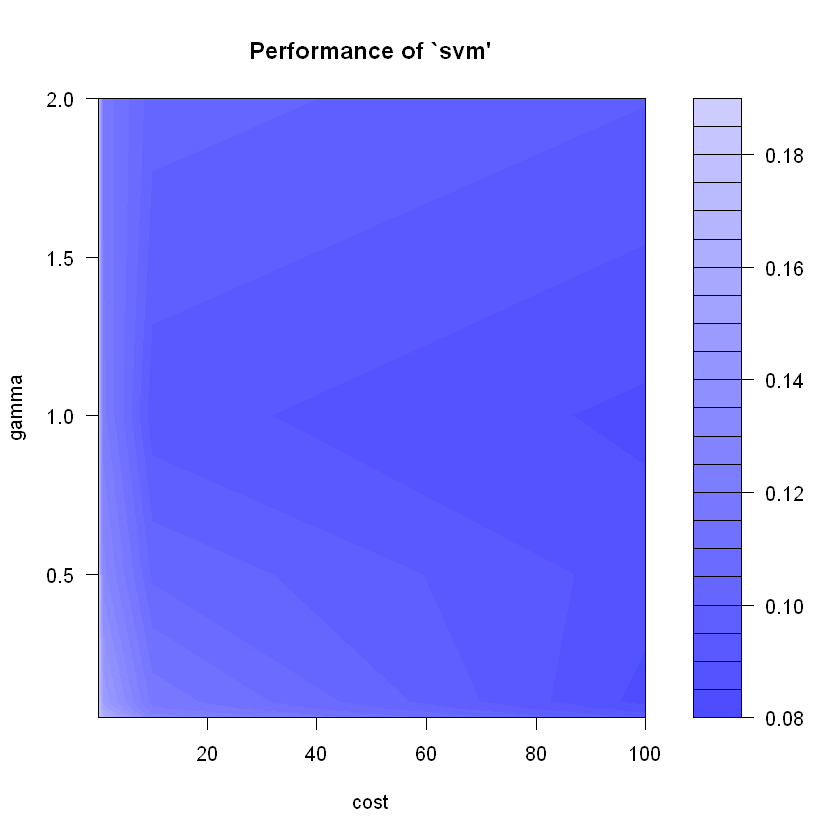

In [16]:
svm_tune <- tune(svm, train.x=x, train.y=y, 
                 kernel="radial", ranges=list(cost=10^(-1:2), gamma=c(0.05,0.08,0.1,0.5,1,2)))

print(svm_tune)
plot(svm_tune)


In [17]:
svm_model <- svm(isFraud ~ step+amount+newbalanceDest+oldbalanceDest+newbalanceOrig+balance_diff+oldbalanceOrg, data=fraud_data_train,
                 kernel="radial", cost=100, gamma=0.5)
summary(svm_model)


Call:
svm(formula = isFraud ~ step + amount + newbalanceDest + oldbalanceDest + 
    newbalanceOrig + balance_diff + oldbalanceOrg, data = fraud_data_train, 
    kernel = "radial", cost = 100, gamma = 0.5)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  100 
      gamma:  0.5 

Number of Support Vectors:  491

 ( 247 244 )


Number of Classes:  2 

Levels: 
 0 1




In [18]:
prd <- predict(svm_model,fraud_data_test)
confusionMatrix(table(prd,fraud_data_test$isFraud))


Confusion Matrix and Statistics

   
prd   0   1
  0 221  32
  1   4 200
                                          
               Accuracy : 0.9212          
                 95% CI : (0.8926, 0.9442)
    No Information Rate : 0.5077          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8427          
 Mcnemar's Test P-Value : 6.795e-06       
                                          
            Sensitivity : 0.9822          
            Specificity : 0.8621          
         Pos Pred Value : 0.8735          
         Neg Pred Value : 0.9804          
             Prevalence : 0.4923          
         Detection Rate : 0.4836          
   Detection Prevalence : 0.5536          
      Balanced Accuracy : 0.9221          
                                          
       'Positive' Class : 0               
                                          

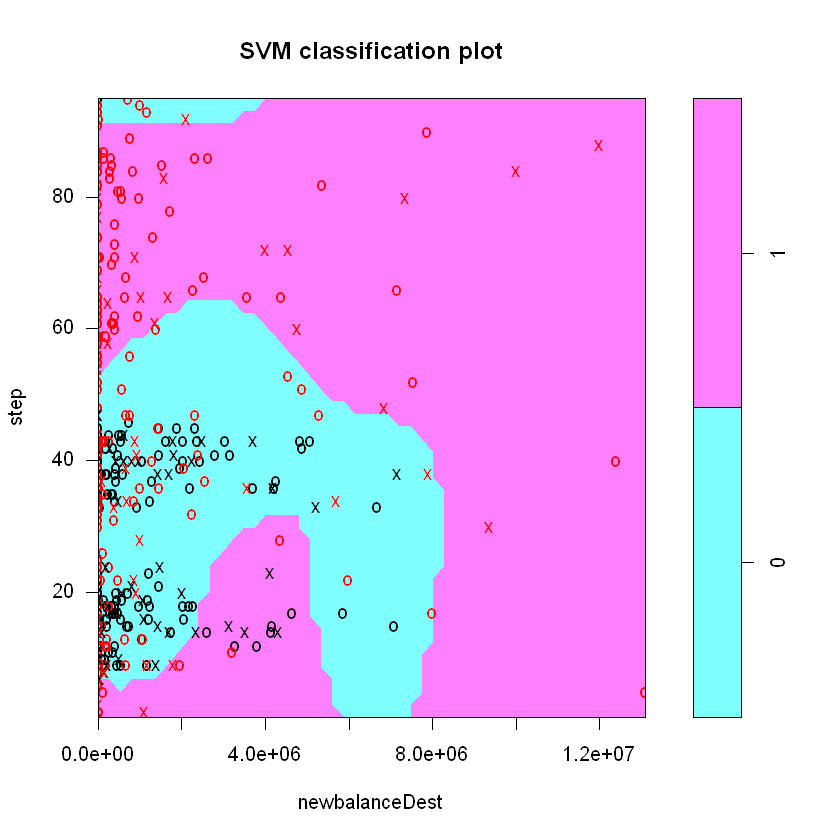

In [43]:

plot(svm_model,fraud_data_test,step~newbalanceDest)

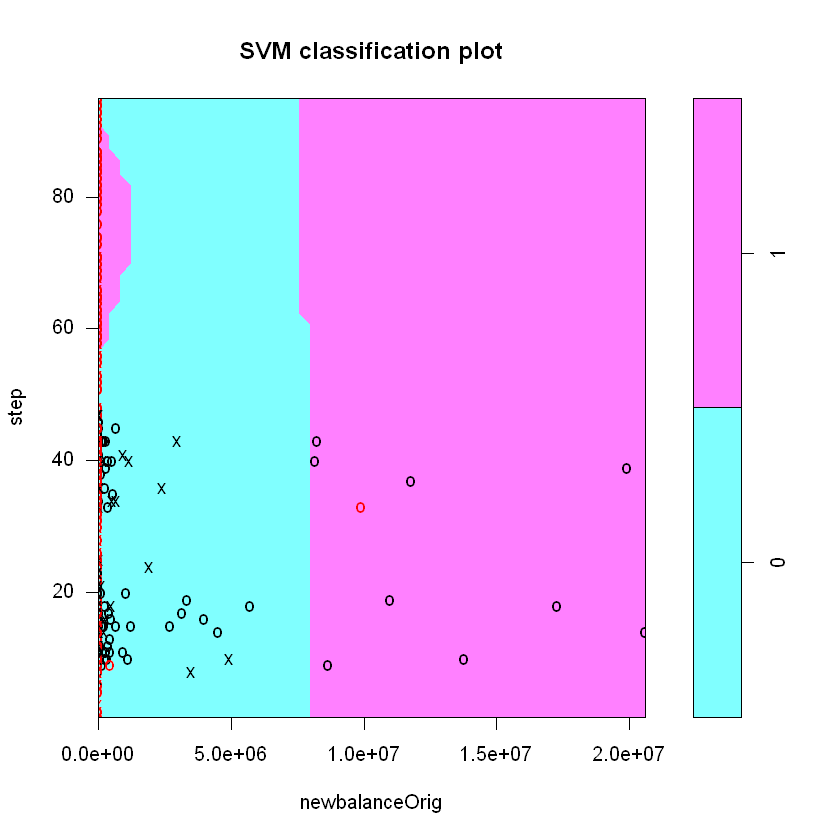

In [50]:
plot(svm_model,fraud_data_test,step~newbalanceOrig)

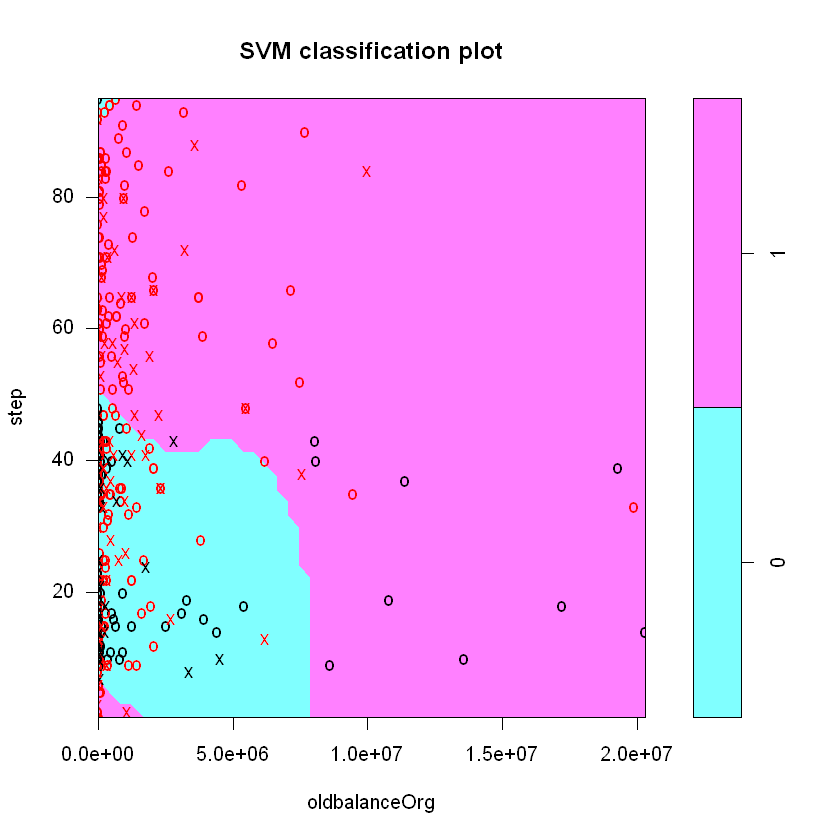

In [51]:
plot(svm_model,fraud_data_test,step~oldbalanceOrg)

In [51]:
## decision tree



Warning message in factor_trafo(x):
"factors at only one level may lead to problems"

 Factor w/ 5 levels "1","2","3","4",..: 3 3 5 3 1 1 1 3 3 3 ...


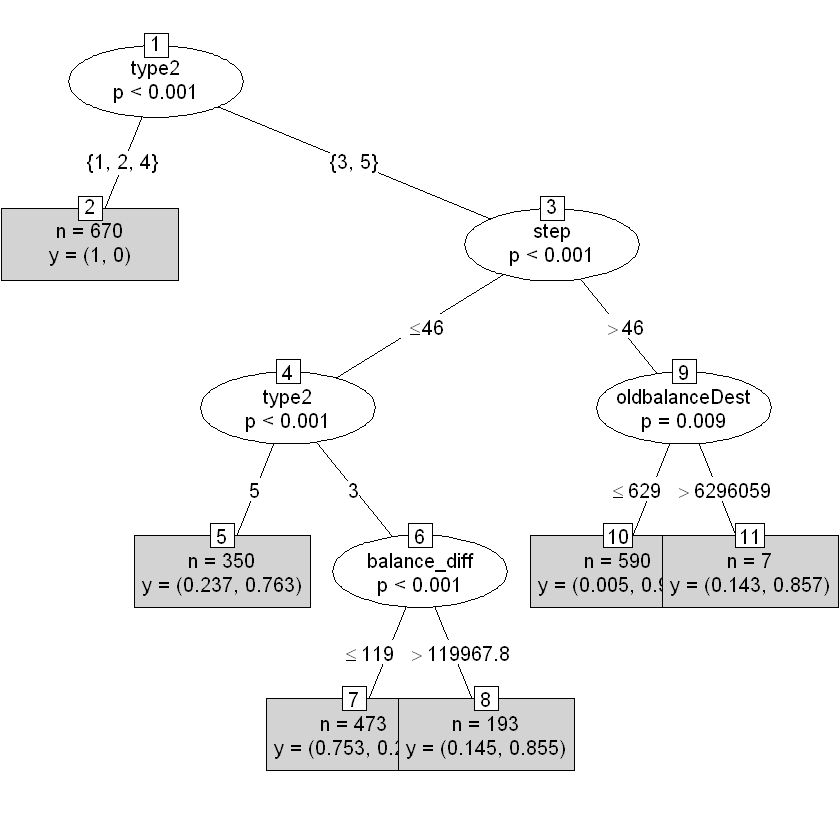

In [66]:
fraud_ctree <- ctree(isFraud~step+amount+oldbalanceOrg+newbalanceOrig+oldbalanceDest+newbalanceDest+balance_diff+type2+isFlaggedFraud,fraud_data_under,controls = ctree_control(mincriterion = 0.99,minsplit = 500
))       

plot(fraud_ctree,type = 'simple',col = blue)   

str(fraud_data_under$type2)

In [53]:
" PAYMENT=1  CASH_IN =2  CASH_OUT=3  DEBIT=4  TRANSFER=5  "

[1] " PAYMENT=1  CASH_IN =2  CASH_OUT=3  DEBIT=4  TRANSFER=5  "

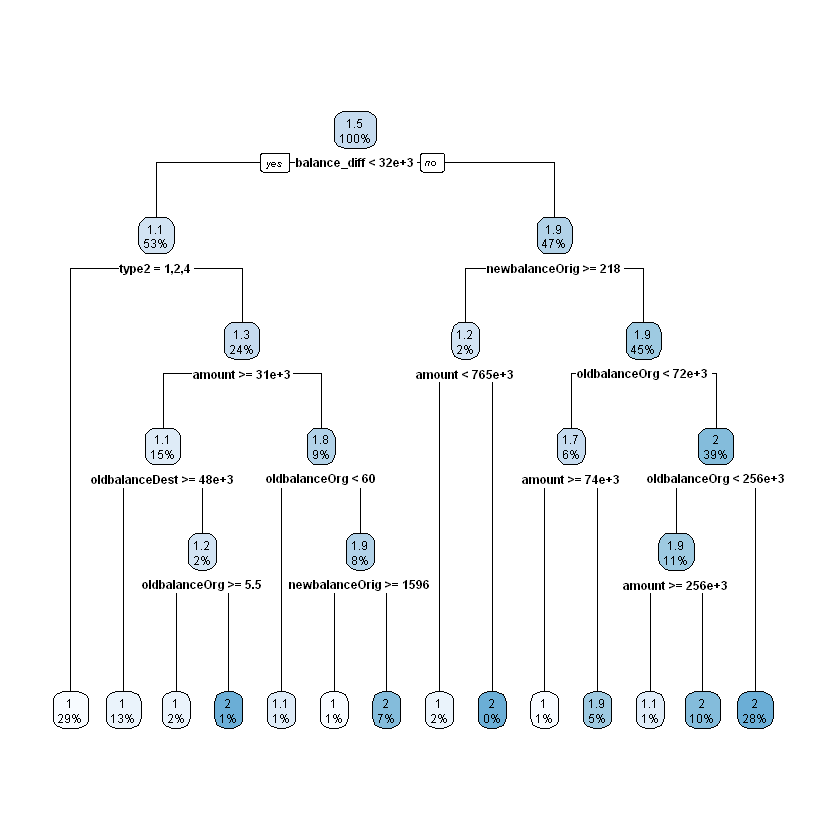

In [54]:
fraud_rpart <- rpart(isFraud~step+amount+oldbalanceOrg+newbalanceOrig+oldbalanceDest+newbalanceDest+balance_diff+type2+isFlaggedFraud,fraud_data_under,method = 'anova')

rpart.plot(fraud_rpart)  

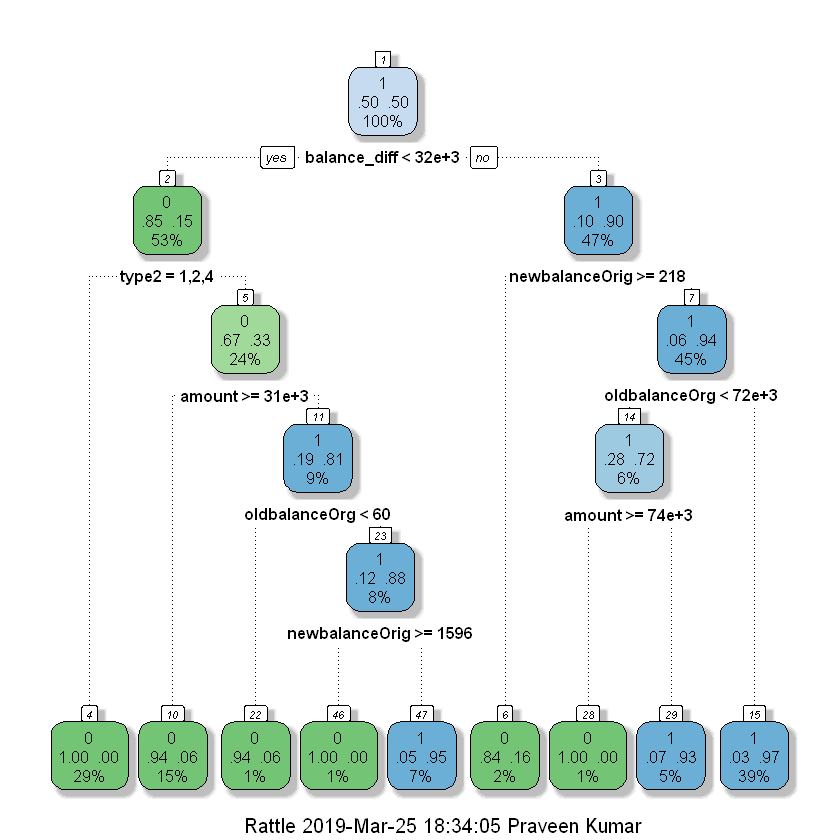

In [46]:
fraud_rpart1 <- rpart(isFraud~step+amount+oldbalanceOrg+newbalanceOrig+oldbalanceDest+newbalanceDest+balance_diff+type2+isFlaggedFraud,fraud_data_under,method = 'class')


fancyRpartPlot(fraud_rpart1)

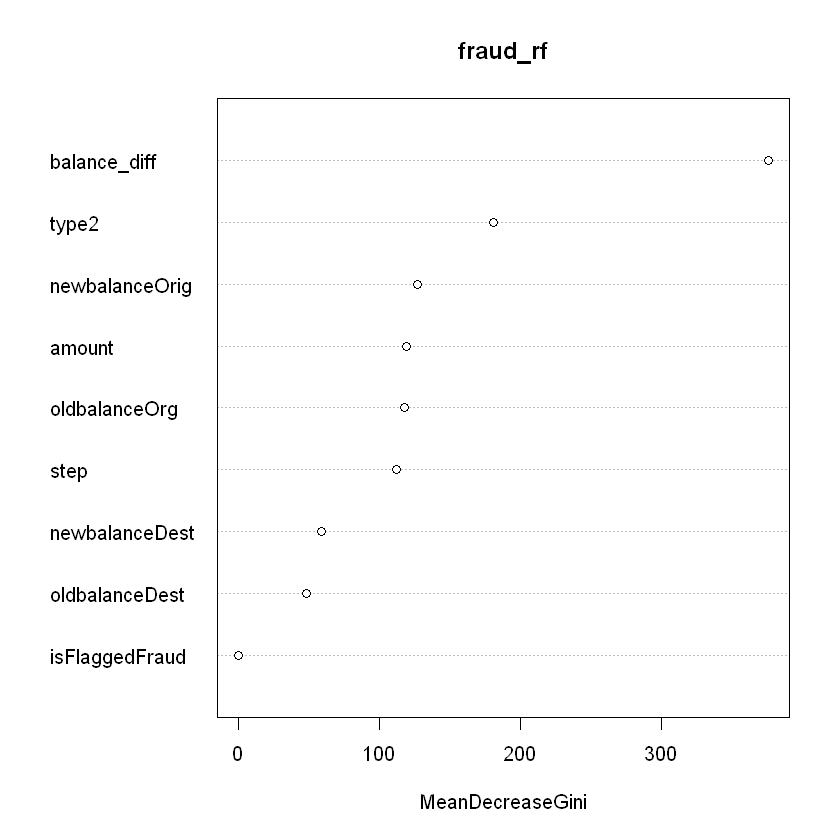

In [49]:

fraud_rf <- randomForest(isFraud~step+amount+oldbalanceOrg+newbalanceOrig+oldbalanceDest+newbalanceDest+balance_diff+type2+isFlaggedFraud,fraud_data_under)

varImpPlot(fraud_rf)

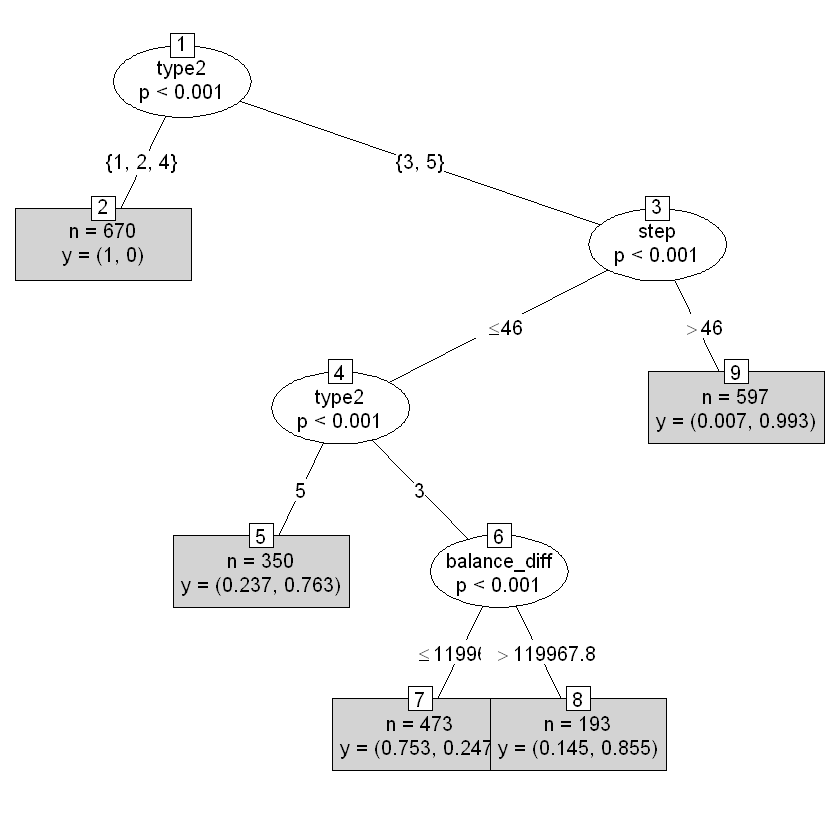

In [67]:
fraud_ctree <- ctree(isFraud~step+amount+balance_diff+type2,fraud_data_under,controls = ctree_control(mincriterion = 0.99,minsplit = 500))       

plot(fraud_ctree,type = 'simple',col = blue) 

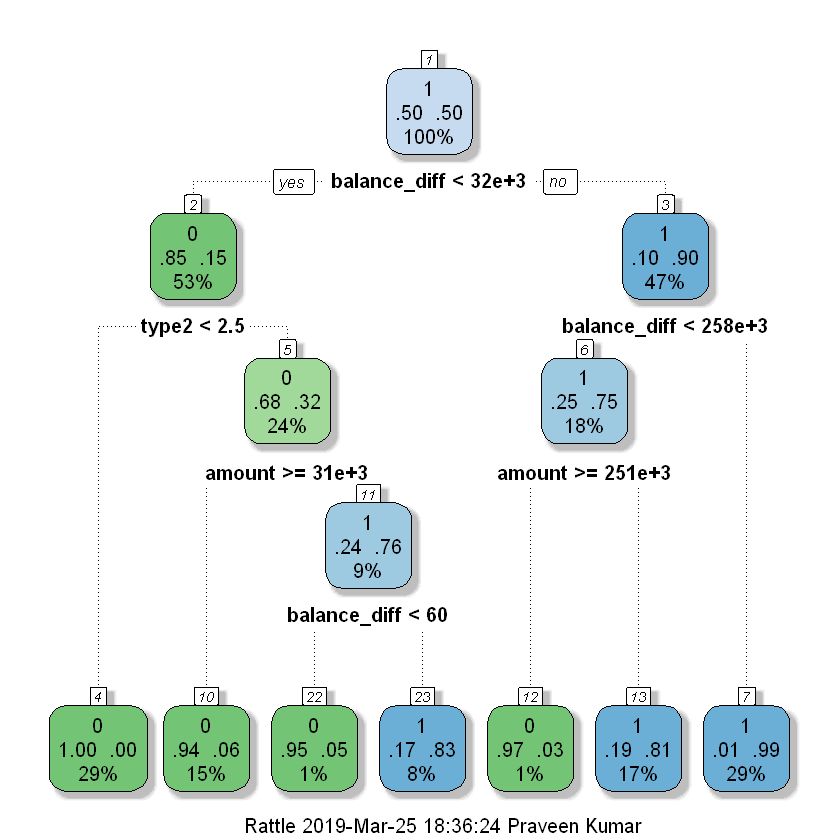

In [53]:

fraud_rpart1 <- rpart(isFraud~step+amount+balance_diff+type2,fraud_data_under,method = 'class')


fancyRpartPlot(fraud_rpart1)


In [54]:
## logisctic on fraud

In [68]:
fraud_data_model <- glm(isFraud~balance_diff,
                        fraud_data_train,
                        family=binomial(link="logit"))

summary(fraud_data_model)

fraud_predict_train <- predict(fraud_data_model,fraud_data_train,type="response")
fraud_predict_test <- predict(fraud_data_model,fraud_data_test,type="response")

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = isFraud ~ balance_diff, family = binomial(link = "logit"), 
    data = fraud_data_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.0900  -0.6748  -0.0031   0.1081   1.7840  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.364e+00  8.115e-02  -16.80   <2e-16 ***
balance_diff  1.814e-05  1.239e-06   14.63   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2531.4  on 1825  degrees of freedom
Residual deviance: 1240.3  on 1824  degrees of freedom
AIC: 1244.3

Number of Fisher Scoring iterations: 10


In [69]:
library(InformationValue)

   
    FALSE TRUE
  0   203   22
  1    44  188

[1] 1

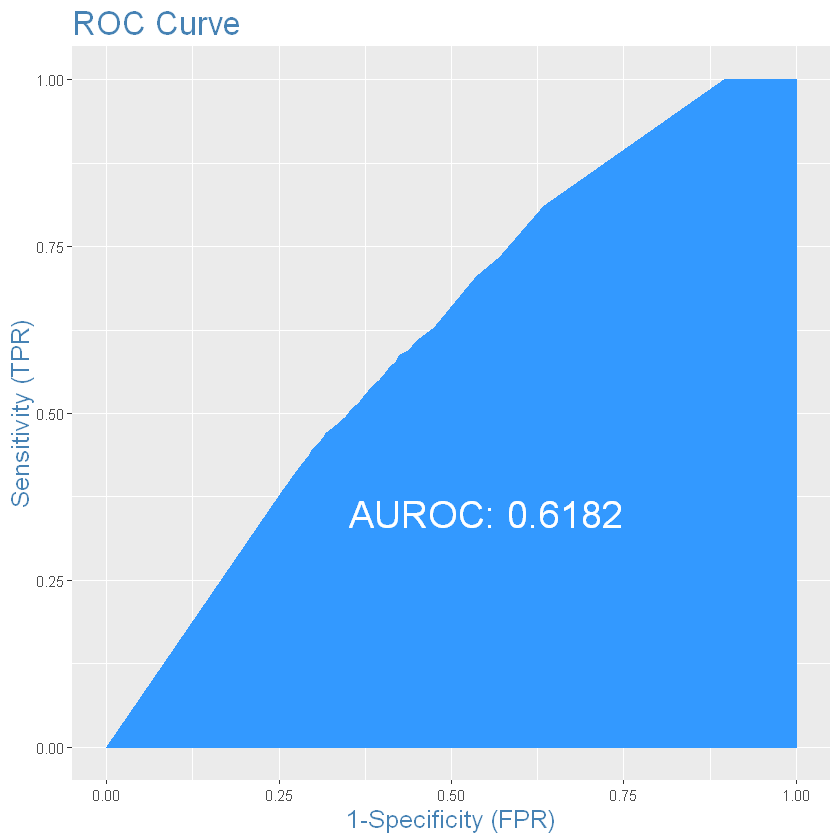

In [71]:
plotROC(fraud_data_test,fraud_predict_test)

table(fraud_data_test$isFraud,fraud_predict_test>0.32)
 ## errort error
optCutOff <- optimalCutoff(fraud_data_test, fraud_predict_test )
optCutOff


In [72]:
fraud_data_test <- mutate(fraud_data_test,predicted = fraud_predict_test )

fraud_data_test <- mutate(fraud_data_test,predicted_0_1 = ifelse(predicted > 0.32,1,0) )
fraud_data_test$predicted_0_1 <- factor(fraud_data_test$predicted_0_1)
table(fraud_data_test$isFraud,fraud_data_test$predicted_0_1)


   
      0   1
  0 203  22
  1  44 188

In [60]:
head(fraud_data_test)

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff,type2,predicted,predicted_0_1
22,PAYMENT,3457.05,C456347792,9067.0,5609.95,M651599236,0.00,0.00,0,0,3457.05,1,2.435120e-01,0
43,CASH_OUT,98546.69,C931952408,536.0,0.00,C1262460245,6978.12,106785.78,0,0,536.00,3,2.270380e-01,0
33,CASH_OUT,61908.26,C326309940,217.0,0.00,C1633733149,0.00,61908.26,0,0,217.00,3,2.198193e-01,0
10,CASH_OUT,35985.04,C29738034,375945.8,339960.72,C53756558,71947.32,107932.36,0,0,35985.04,3,2.822116e-01,0
12,CASH_IN,289358.89,C1895228129,101821.0,391179.89,C808432902,4098718.60,3809359.72,0,0,-289358.89,2,2.123802e-05,0
46,CASH_OUT,3076.45,C976096218,55228.0,52151.55,C505423042,750661.29,753737.75,0,0,3076.45,3,3.210153e-01,0


In [78]:
newdat <- data.frame(
  balance_diff=seq(min(fraud_data_train$balance_diff), max(fraud_data_train$balance_diff,len=4000000)))

newdat$admitted = predict(fraud_data_model, newdata=newdat, type="response")

fraud_data_train$Fraud <- as.numeric(fraud_data_train$isFraud)
str(fraud_data_train)





'data.frame':	1826 obs. of  14 variables:
 $ step          : int  44 57 40 71 83 45 6 73 10 19 ...
 $ type          : Factor w/ 5 levels "CASH_IN","CASH_OUT",..: 2 2 4 5 5 1 2 5 2 2 ...
 $ amount        : num  82366 157610 13838 386996 2498370 ...
 $ nameOrig      : chr  "C1822188092" "C1227085633" "C137495867" "C436643721" ...
 $ oldbalanceOrg : num  12538 157610 230387 386996 2498370 ...
 $ newbalanceOrig: num  0 0 216549 0 0 ...
 $ nameDest      : chr  "C1259538488" "C1712237759" "M1700857574" "C295403005" ...
 $ oldbalanceDest: num  123946 949587 0 0 0 ...
 $ newbalanceDest: num  206311 1107198 0 0 0 ...
 $ isFraud       : Factor w/ 2 levels "0","1": 1 2 1 2 2 1 2 2 2 1 ...
 $ isFlaggedFraud: Factor w/ 1 level "0": 1 1 1 1 1 1 1 1 1 1 ...
 $ balance_diff  : num  12538 157610 13838 386996 2498370 ...
 $ type2         : Factor w/ 5 levels "1","2","3","4",..: 3 3 1 5 5 2 3 5 3 3 ...
 $ Fraud         : num  1 2 1 2 2 1 2 2 2 1 ...


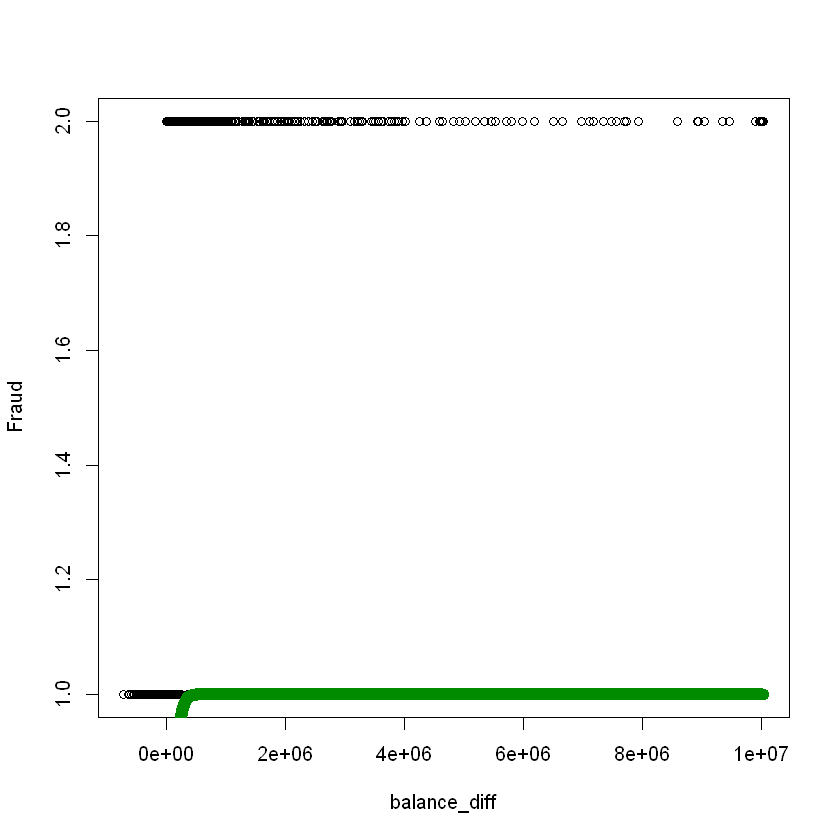

In [79]:

plot( Fraud ~ balance_diff,fraud_data_train)


lines(admitted ~ balance_diff , newdat, col="green4", lwd=10)